In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = models.Sequential([
    layers.Dense(units=64,activation="relu",input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(units=32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=3, activation="softmax")

])
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.4091 - loss: 1.0900 - val_accuracy: 0.5333 - val_loss: 0.9860
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5282 - loss: 1.0067 - val_accuracy: 1.0000 - val_loss: 0.9054
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6548 - loss: 0.9242 - val_accuracy: 0.8667 - val_loss: 0.8365
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8400 - val_accuracy: 0.8667 - val_loss: 0.7711
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7916 - val_accuracy: 0.8667 - val_loss: 0.7116
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7816 - loss: 0.7537 - val_accuracy: 0.8667 - val_loss: 0.6555
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7724 - loss: 0.6908 - val_accuracy: 0.8667 - val_loss: 0.6043
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8186 - loss: 0.6340 - val_accuracy: 0.8667 - val_loss: 0.5557


In [ ]:
loss,accuracy = model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.1334
0.1334039568901062
1.0


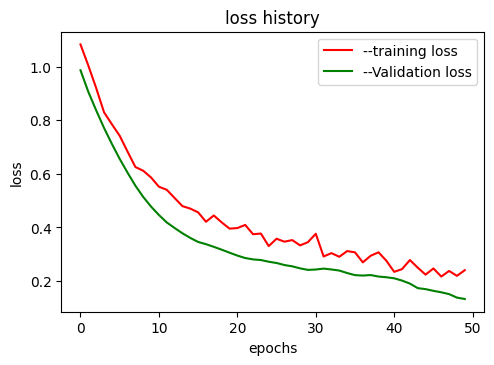

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history.history['loss'],color='red',label ='--training loss')
plt.plot(history.history['val_loss'],color='green',label ='--Validation loss')
plt.title("loss history")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

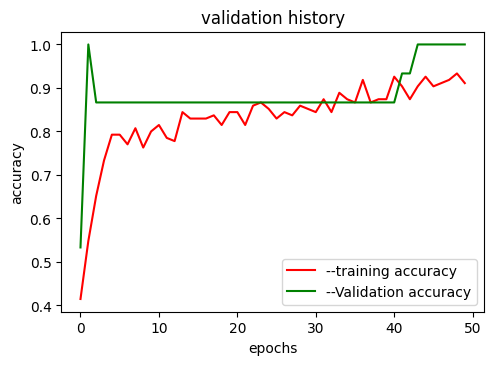

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'],color='red',label ='--training accuracy')
plt.plot(history.history['val_accuracy'],color='green',label ='--Validation accuracy')
plt.title("validation history")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import load_digits

digits = load_iris()
X, y = iris.data, iris.target

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Project: Handwritten Digit Recognition.
Goal: Build a model that can identify a handwritten digit (0-9).

Instructions to follow

- Your Mission: Your goal is to build the most accurate model you can to recognize handwritten digits.
- Load the Data: Instead of load_iris(), you'll use from sklearn.datasets import load_digits.
- Explore: What is the shape of this new X data? How many classes are in y?
- Prepare the Data: You know the drill!
- Build Your Model:
- What will your input_shape be?
- What activation function and how many units will your final Dense layer have? Add at least one Dropout layer to prevent overfitting.
- Compile Your Model:
- Choose your optimizer (adam is great).
- Choose the correct loss function for a multi-class problem with integer labels.
- Train and Visualize:
- Train your model using .fit() and save the history.
- Plot the loss and accuracy curves! See if you can spot any overfitting.
***Experiment!***
- Try changing the Dropout rate (e.g., from 0.2 to 0.5). How does that affect your plots?
- Try adding another Dense and Dropout layer. Does it help or hurt?
- Evaluate: What is the final test accuracy of your best model?